## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

In [7]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

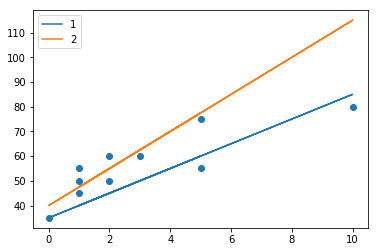

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [8]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [9]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [10]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [11]:
X.shape

(2, 10)

In [12]:
X.T.shape

(10, 2)

In [13]:
all(X @ y == np.dot(X,y))

True

In [14]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [15]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

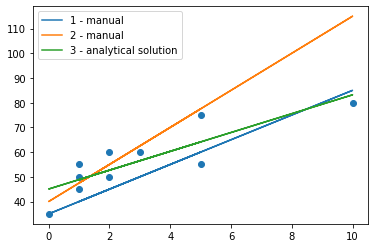

In [16]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [17]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [18]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [19]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [20]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [21]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [22]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [23]:
W[0], W[0] - g

(45.0625, 45.29125)

### Д/З

__1.__ Подберите скорость обучения (alpha) и количество итераций

In [42]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


__Решение__

Запакуем код в функцию и будем ёё оптимизировать

In [78]:
def get_linear_optimum(X, y, count=100, alpha=1e-2):
    mse = lambda y, y_pred: np.mean((y - y_pred)**2)
    n = X.shape[1]
    W = np.array([1, 0.5])

    ans = list()

    for i in range(count):
        y_pred = np.dot(W, X)
        err = mse(y, y_pred)
        for k in range(W.shape[0]):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
        ans.append((err, i, alpha, *W))
    
    return min(ans, key=lambda x: x[0])

In [105]:
ans = get_linear_optimum(X, y, 10000)
print(f'MSE = {round(ans[0],2)}\tStep = {ans[1]}\tAlpha = {ans[2]}\tW = [{round(ans[3],2)} {round(ans[4],2)}]')

MSE = 43.97	Step = 2354	Alpha = 0.01	W = [45.06 3.81]


В принципе, эти веса - минимум. А теперь возьмем итератор по `alpha`

In [74]:
import pandas as pd

In [90]:
df = pd.DataFrame(
    [get_linear_optimum(X, y, 10**4, alpha) for alpha in np.arange(0.009,0.07, 0.001)],
    columns=['MSE', 'Step', 'Alpha', 'W0', 'W1']
).set_index('Alpha')

/Users/gusevdv/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/Users/gusevdv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/Users/gusevdv/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


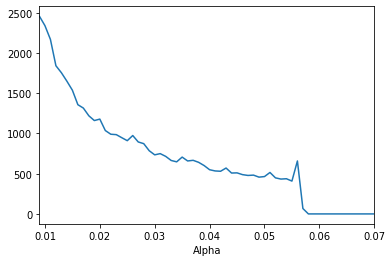

In [92]:
df['Step'].plot();

Похоже, что MSE на каком-то шаге alpha просело. Возьмем минимумы

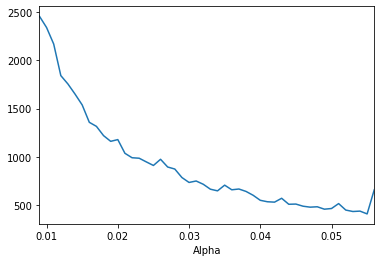

In [93]:
df[df.MSE == df.MSE.min()]['Step'].plot()

В итоге, оптимальный ответ:

In [101]:
df.sort_values(['MSE', 'Step']).head(1)

,MSE,Step,W0,W1
Alpha,,,,
0.055,43.96875,408,45.0625,3.8125


__2.__ В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [112]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


__Решение__

ошибка в месте `np.sum`. На выходе должен получиться вектор, а выходит скаляр. Укажем ось:

In [113]:
for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)

    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis = 1))
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Iteration #0: W_new = [11.37583333 10.3325    ], MSE = 597.49
Iteration #10: W_new = [14.26001758  9.40351987], MSE = 499.13
Iteration #20: W_new = [16.95579065  8.90929096], MSE = 422.93
Iteration #30: W_new = [19.41641061  8.46302386], MSE = 359.48
Iteration #40: W_new = [21.66162431  8.05588802], MSE = 306.65
Iteration #50: W_new = [23.71027857  7.68439614], MSE = 262.67
Iteration #60: W_new = [25.57958125  7.34542692], MSE = 226.06
Iteration #70: W_new = [27.28523385  7.03613312], MSE = 195.57
Iteration #80: W_new = [28.8415633   6.75391677], MSE = 170.19
Iteration #90: W_new = [30.26164226  6.49640735], MSE = 149.05
